# Parameter estimation of exponential distribution with an upper bound

Created on Wed Mar  6 07:49:41 2019 @author: Jongmin Sung

In [38]:
# Import library
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Generate n_sample from exponential distribution with t_true
n_sample = 1000
t_true = 10
t_sample = np.random.exponential(t_true, n_sample) 

Text(0.5, 1.0, 'True=10.0 (black), Mean=10.1 (blue) (N=1000)')

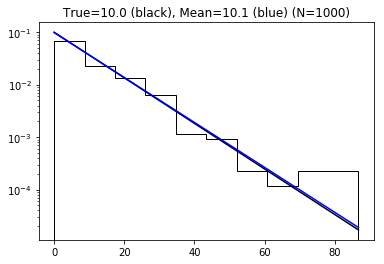

In [51]:
# Mean estimation works well. 
t = np.linspace(0, t_sample.max(), 100)
exp_true = np.exp(-t/t_true)/t_true
exp_mean = np.exp(-t/t_sample.mean())/t_sample.mean()

plt.hist(t_sample, color='k', histtype='step', density='True', lw=1)
plt.plot(t, exp_true, 'k')
plt.plot(t, exp_mean, 'b')
plt.yscale('log')
plt.title('True=%.1f (black), Mean=%.1f (blue) (N=%d)' %(t_true, t_sample.mean(), n_sample))

In [52]:
# Our measurements (sample) have upper limit (t_max)
t_max = 20 
t_sample_max = t_sample[t_sample<t_max] # Take sample below t_max

Text(0.5, 1.0, 'True=10.0 (black), Mean=6.7 (blue) (N=1000)')

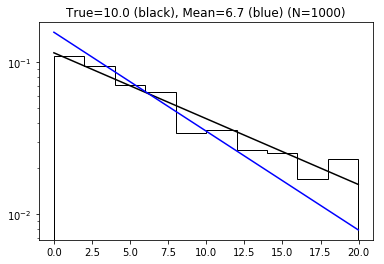

In [55]:
# Mean estimation underestimates due to missing long evetns.
t = np.linspace(0, t_sample_max.max(), 100)

exp_true = np.exp(-t/t_true)/t_true
exp_true = exp_true/(1-np.exp(-t_max/t_true)) # Normalization 
exp_mean = np.exp(-t/t_sample_max.mean())/t_sample_max.mean()
exp_mean = exp_mean/(1-np.exp(-t_max/t_sample_max.mean())) # Normalization

plt.hist(t_sample_max, color='k', histtype='step', density='True', lw=1)
plt.plot(t, exp_true, 'k')
plt.plot(t, exp_mean, 'b')
plt.yscale('log')
plt.title('True=%.1f (black), Mean=%.1f (blue) (N=%d)' %(t_true, t_sample_max.mean(), n_sample))

### Correct the parameter with Eq. (1)

\begin{equation*}
\large \tau = \bar{t} + \frac{t_{max}}{e^{\frac{t_{max}}{\tau}}-1} \qquad (1)
\end{equation*}

In [58]:
# Do iteration
n_iter = 100

tau = t_sample_max.mean()  # Initial guess with mean
for i in range(n_iter): 
    tau = t_sample_max.mean() + t_max / (np.exp(t_max/tau) - 1)   

In [ ]:
use bokeh

In [59]:
# User parameters
n_dataset = 1000
n_sample = 10000
t_true = 10
t_max = range(int(t_true/2), int(t_true*10)+1, int(t_true/2)) 
n_iter = 100


In [7]:
# Array to save the parameter extimation result [row, col] = [dataset, t_max]
result_sample = np.zeros((n_dataset, len(t_max)))    
result_discrete = np.zeros((n_dataset, len(t_max)))   

In [8]:
# Generate array of exponential random variables
for i in range(n_dataset):
    # Generate n_sample continuous rv from exponential distribution
    t_sample = np.random.exponential(t_true, n_sample) 
    t_sample_dataset[i] = t_sample # Save in dataset       

    # Discretized sample (This is what we actually measure in experiment)
    t_discrete = np.round(t_sample) # This becomes geometric distribution
    t_discrete = t_discrete[t_discrete>0]
    t_discrete_dataset[i] = t_discrete # Save in dataset     

    # Parameter estimation of tau with varying t_max        
    for j, t_cut in enumerate(t_max):
        t_sample_cut = t_sample[t_sample < t_cut]
        t_discrete_cut = t_discrete[t_discrete < t_cut]
        
        tau_sample = t_sample_cut.mean() # Initial guess of tau
        tau_discrete = t_discrete_cut.mean() # Initial guess of tau
                     
        # Iteratively find the original t_mean w/o cutoff
        for k in range(n_iter): 
            tau_sample= t_sample_cut.mean() + t_cut / (np.exp(t_cut/tau_sample) - 1)   
            tau_discrete = t_discrete_cut.mean() + t_cut / (np.exp(t_cut/tau_discrete) - 1)                  
#                tau_discrete = t_discrete_cut.mean()                   
           
        result_sample[i][j] = tau_sample # Corrected t_mean after n_iter
        result_discrete[i][j] = -1/np.log(1-1/tau_discrete) # Corrected t_mean after n_iter 
#            result_discrete[i][j] = tau_discrete

(0, 10)

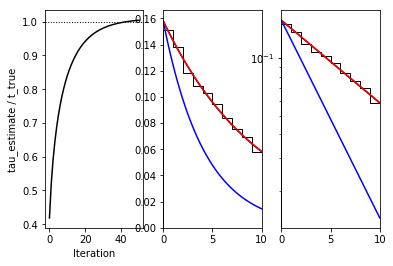

In [9]:
# Plot_Convergece ---------------------------------------------------------
t_cut = t_true * 1
t_sample = t_sample_dataset[0]
t_sample_cut = t_sample[t_sample < t_cut]

tau = np.zeros(n_iter+1)
tau[0] = t_sample_cut.mean() # Initial guess of tau
for k in range(n_iter): # Iteratively find the original t_mean w/o cutoff
    tau[k+1] = t_sample_cut.mean() + t_cut / (np.exp(t_cut/tau[k]) - 1)  

t = np.linspace(0, t_cut, 100)    
bins = [i for i in range(t_cut+1)]

fig = plt.figure('Convergence', clear=True)    
    
sp = fig.add_subplot(131)
sp.plot(tau/t_true, 'k')
sp.axhline(y=1, color='k', linestyle='dotted', lw=1)   
sp.set_xlabel('Iteration')
sp.set_ylabel('tau_estimate / t_true')

sp = fig.add_subplot(132)
norm = 1/t_true/(1-np.exp(-t_cut/t_true))
sp.hist(t_sample_cut, bins, color='k', histtype='step', density='True', lw=1)
sp.plot(t, np.exp(-(t)/t_true)*norm, 'k')
sp.plot(t, np.exp(-(t)/t_sample_cut.mean())*norm, 'b')
sp.plot(t, np.exp(-(t)/tau[-1])*norm, 'r')
sp.set_xlim([min(bins), max(bins)])

sp = fig.add_subplot(133)
sp.hist(t_sample_cut, bins, color='k', histtype='step', density='True', lw=1)     
sp.plot(t, np.exp(-(t)/t_true)*norm, 'k')      
sp.plot(t, np.exp(-(t)/t_sample_cut.mean())*norm, 'b')        
sp.plot(t, np.exp(-(t)/tau[-1])*norm, 'r')
sp.set_yscale('log')
sp.set_xlim([min(bins), max(bins)])

Text(0, 0.5, 't_estimate / t_true')

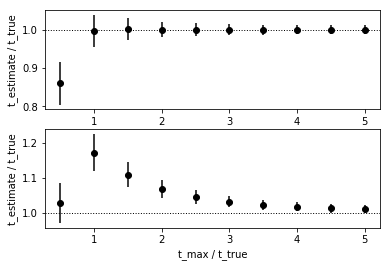

In [10]:
# Plot_Accuracy -------------------------------------------------------------
t_exp_mean = result_sample.mean(axis=0) / t_true
t_exp_std = result_sample.std(axis=0) / t_true
t_max_true = np.array([i/t_true for i in t_max])

t_geo_mean = result_discrete.mean(axis=0) / t_true
t_geo_std = result_discrete.std(axis=0) / t_true 

fig = plt.figure('Estimate', clear=True)    
    
sp = fig.add_subplot(211)
sp.errorbar(t_max_true, t_exp_mean, yerr = t_exp_std, color='k', fmt='o')
sp.axhline(y=1, color='k', linestyle='dotted', lw=1)   
sp.set_xlabel('t_max / t_true')
sp.set_ylabel('t_estimate / t_true')    

sp = fig.add_subplot(212)
sp.errorbar(t_max_true, t_geo_mean, yerr = t_geo_std, color='k', fmt='o')
sp.axhline(y=1, color='k', linestyle='dotted', lw=1)   
sp.set_xlabel('t_max / t_true')
sp.set_ylabel('t_estimate / t_true')        

In [4]:
# User parameters
n_dataset = 1000         # Number of datasets
n_sample = 10000         # Number of sample per dataset
t_true = 10              # True mean time
t_max = range(5, 55, 5)  # t_max for the text
n_iter = 50              # Number of iteration for convergence